In [1]:
# I066_Experiment_ML_Practical_7

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Reading the Dataset and loading as a dataframe.
df = pd.read_csv("/content/adultPrac7.csv")

## EDA:

In [12]:
df.shape

(32561, 15)

In [10]:
df.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
# Checking Labels in workclass variable:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
# Showing the Value counts of each category of each workclass category.
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [21]:
# To replace the '?' with NaN values as that can be handled by pandas library.
df['workclass'].replace(' ?', np.NaN, inplace = True)

In [24]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [23]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [25]:
df.capital_gainreplace(' ?', np.NaN, inplace = True)

In [34]:
# Checking for '?' value in other features
df[df == "?"].count()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [35]:
# X signify the features, Y signify labels
X = df.drop(['income'], axis = 1)
Y = df["income"]

In [36]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [37]:
Y.dtypes

dtype('O')

In [42]:
# Displaying the categorical features:
categorical = [col for col in X.columns if X[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [43]:
# Displaying the numerical features:
numerical = [col for col in X.columns if X[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [44]:
# Print percentage of missing values in the Categorical variables in the training set
X[categorical].isnull().mean()

workclass         0.056386
education         0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017905
dtype: float64

In [47]:
# Since these are categorical values, we cannot use mean and hence use mode to replace the Nan values:
# Three features - workclass, occupation and native_country have null values and hence we replace them with the highest freuqncy of that respective feature.
# impute the missing categorical variables with most freuqnt value:
for df2 in [X]:
  df2['workclass'].fillna(X['workclass'].mode()[0], inplace = True)
  df2['occupation'].fillna(X['occupation'].mode()[0], inplace = True)
  df2['native_country'].fillna(X['native_country'].mode()[0], inplace = True)

In [49]:
# Checking missing values in the feature set:
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [50]:
# Now we do label encoding after eliminating all null values from the dataset:
X[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [53]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in X[categorical]:
  X[i] = label_encoder.fit_transform(X[i])

# The above for loop eliminates the need for transforming each categorical feature individually like this:
# X['workclass'] = label_encoder.fit_transform(X['workclass'])
# X['education'] = label_encoder.fit_transform(X['workclass'])
# X['marital_status'] = label_encoder.fit_transform(X['workclass'])
# X['occupation'] = label_encoder.fit_transform(X['workclass'])
# X['relationship'] = label_encoder.fit_transform(X['workclass'])
# X['race'] = label_encoder.fit_transform(X['workclass'])
# X['sex'] = label_encoder.fit_transform(X['workclass'])
# X['native_country'] = label_encoder.fit_transform(X['workclass'])

In [54]:
X.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38


In [60]:
# Now we need to normalize the data, as each feature has a varying range:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [61]:
# Checking the shape of training and testing samples after splitting
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
# Train a Gaussian Naive Bayes Classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# Fit the model:
gnb.fit(X_train, y_train)


GaussianNB()

In [64]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [68]:
print(cm, "\n", ac)

[[7037  370]
 [1510  852]] 
 0.8075545091616337


In [73]:
print("True Positives : ", cm[0, 0])
print("True Negatives : ", cm[1, 1])
print("False Positives : ", cm[0, 1])
print("False Negatives : ", cm[1, 0])

True Positives :  7037
True Negatives :  852
False Positives :  370
False Negatives :  1510


<AxesSubplot:>

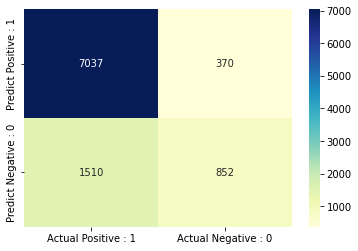

In [72]:
cm_matrix = pd.DataFrame(data = cm, columns = ["Actual Positive : 1", "Actual Negative : 0"], index = ["Predict Positive : 1", "Predict Negative : 0"])
import seaborn as sns
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7407
        >50K       0.70      0.36      0.48      2362

    accuracy                           0.81      9769
   macro avg       0.76      0.66      0.68      9769
weighted avg       0.79      0.81      0.78      9769



In [76]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2) # We mention in the parameters for it to take
# 5 nearest neigbors(default value) and p = 2(default value = Eucledian distance)
classifier.fit(X_train, y_train) # Feed the training data to the classifier.

KNeighborsClassifier()

In [77]:
y_pred = classifier.predict(X_test) # Predicting for x_test data
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype=object)

In [78]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm, "\n", ac)

[[6685  722]
 [ 990 1372]] 
 0.8247517657897431


# Conclusion:


1.   The accuracy of Naive-Bayes is 80.7%
2.   The accuracy of KNN Neighbours (with k = 5) is 82.4%
From the acquired results, we can conclude that KNN is better for the sample which we took in this case.


## Learnt the following from the above experiment:
1.	Implement Naïve Bayes technique for the classification
2.	Compare results of Naïve Bayes and KNN
3.	Understand and infer results of different classification metrics
